**Dò kết quả 20 năm của xổ số kiến thiết và đưa ra dự đoán những cases dễ trúng cho anh em nào thích mua xổ số bằng bằng Python và ipynb**

*Import Files*

In [2]:
import pandas as p
import matplotlib.pyplot as plot
import seaborn as sb

*Read Files*

In [3]:
path_to_csv:str = './CSVs/XS_HCM_Do_Tai.csv'
data_XSMB = p.read_csv(path_to_csv)
data_XSMB

,Results
0,404203
1,447907
2,113944
3,267716
4,251992
...,...
4605,69008
4606,42193
4607,47786
4608,87597


*Sort odd or even value*

In [4]:
data_XSMB["odd"] = data_XSMB["Results"].apply(lambda x: "YES" if x%2 == 0 else "NO")
data_XSMB

,Results,odd
0,404203,NO
1,447907,NO
2,113944,YES
3,267716,YES
4,251992,YES
...,...,...
4605,69008,YES
4606,42193,NO
4607,47786,YES
4608,87597,NO


*Count odd and even value*

In [5]:
data_XSMB['odd'].value_counts()

NO     2504
YES    2106
Name: odd, dtype: int64

In [6]:
data_XSMB_odd = data_XSMB.groupby('odd').count().reset_index()
data_XSMB_odd

,odd,Results
0,NO,2504
1,YES,2106


*Draw Graph*

<AxesSubplot:xlabel='odd', ylabel='Results'>

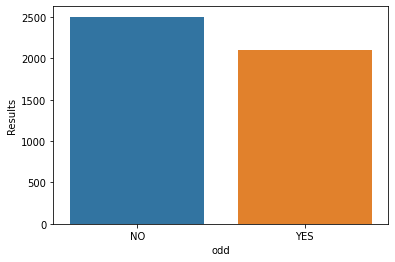

In [7]:
sb.barplot(data=data_XSMB_odd, x= 'odd', y= 'Results')

*Take last 2 digits*

In [8]:
data_XSMB['last2digits'] = data_XSMB['Results'].apply(lambda par : (str(par)[-2:]))
data_XSMB

,Results,odd,last2digits
0,404203,NO,03
1,447907,NO,07
2,113944,YES,44
3,267716,YES,16
4,251992,YES,92
...,...,...,...
4605,69008,YES,08
4606,42193,NO,93
4607,47786,YES,86
4608,87597,NO,97


*Count anđ draw graph of which last two digits have the highest amount*


In [9]:
data_XSMB['last2digits'].value_counts()

29    86
33    79
81    78
07    76
53    75
      ..
84    25
76    24
88    23
65    21
42    18
Name: last2digits, Length: 100, dtype: int64

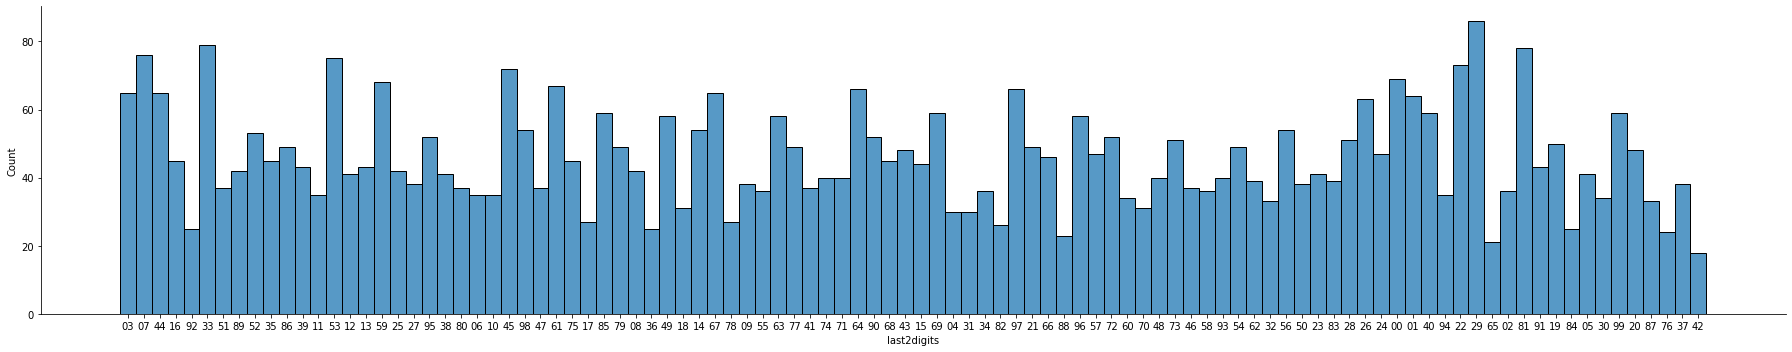

In [10]:
sb.displot(data_XSMB['last2digits'], bins=10, height=5, aspect=5)